In [2]:
import numpy as np 
import pandas as pd
import os

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import datetime

import math
from sklearn.preprocessing import MinMaxScaler

from tqdm import tqdm
# from keras.models import Sequential
# from keras.layers import Dense, LSTM

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.optimizers import Adam



In [81]:
df_gik=pd.read_excel('/kaggle/input/air-quality-rwanda/Air Quality Data in Kigali From 2020-2024.xlsx','Gikondo-Mburabuturo')
df_jal=pd.read_excel('/kaggle/input/air-quality-rwanda/Air Quality Data in Kigali From 2020-2024.xlsx','Jali')
df_monK=pd.read_excel('/kaggle/input/air-quality-rwanda/Air Quality Data in Kigali From 2020-2024.xlsx','Mont Kigali')
df_rus=pd.read_excel('/kaggle/input/air-quality-rwanda/Air Quality Data in Kigali From 2020-2024.xlsx','Rusororo')

In [82]:
df_gik.head()

,Unnamed: 0,SO2,CO,PM10,NO2,O3,PM2.5
0,2021-05-25 21:00:00,31.696667,755.743000,51.714333,24.061333,7.670667,43.348000
1,2021-05-25 22:00:00,30.666364,708.372409,54.127500,23.060682,6.879227,44.954318
2,2021-05-25 23:00:00,38.388774,1119.366368,62.395425,22.461415,6.053302,52.041368
3,2021-05-26 00:00:00,36.220982,1013.703527,67.050357,22.940446,3.724018,55.130089
4,2021-05-26 01:00:00,30.945747,873.517014,61.042081,20.769140,3.850769,49.938733


In [83]:
df_gik.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15790 entries, 0 to 15789
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  15790 non-null  datetime64[ns]
 1   SO2         15790 non-null  float64       
 2   CO          15790 non-null  float64       
 3   PM10        15790 non-null  float64       
 4   NO2         15790 non-null  float64       
 5   O3          15790 non-null  float64       
 6   PM2.5       15790 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 863.6 KB


In [84]:
df_gik["Timestamp"] = pd.to_datetime(df_gik["Unnamed: 0"])
df_jal["Timestamp"] = pd.to_datetime(df_jal["Unnamed: 0"])
df_monK["Timestamp"] = pd.to_datetime(df_monK["Unnamed: 0"])
df_rus["Timestamp"] = pd.to_datetime(df_rus["Unnamed: 0"])

In [85]:
df_gik.drop("Unnamed: 0", axis =1, inplace=True)
df_jal.drop("Unnamed: 0", axis =1, inplace=True)
df_monK.drop("Unnamed: 0", axis =1, inplace=True)
df_rus.drop("Unnamed: 0", axis =1, inplace=True)

In [86]:
df_gik.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15790 entries, 0 to 15789
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   SO2        15790 non-null  float64       
 1   CO         15790 non-null  float64       
 2   PM10       15790 non-null  float64       
 3   NO2        15790 non-null  float64       
 4   O3         15790 non-null  float64       
 5   PM2.5      15790 non-null  float64       
 6   Timestamp  15790 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6)
memory usage: 863.6 KB


In [87]:
df_gik.head()

,SO2,CO,PM10,NO2,O3,PM2.5,Timestamp
0,31.696667,755.743000,51.714333,24.061333,7.670667,43.348000,2021-05-25 21:00:00
1,30.666364,708.372409,54.127500,23.060682,6.879227,44.954318,2021-05-25 22:00:00
2,38.388774,1119.366368,62.395425,22.461415,6.053302,52.041368,2021-05-25 23:00:00
3,36.220982,1013.703527,67.050357,22.940446,3.724018,55.130089,2021-05-26 00:00:00
4,30.945747,873.517014,61.042081,20.769140,3.850769,49.938733,2021-05-26 01:00:00


In [88]:
df_gik['Date']=df_gik["Timestamp"].dt.date
df_jal['Date']=df_jal["Timestamp"].dt.date
df_monK['Date']=df_monK["Timestamp"].dt.date
df_rus['Date']=df_rus["Timestamp"].dt.date

In [89]:
df_gik['Year']=df_gik["Timestamp"].dt.year
df_jal['Year']=df_jal["Timestamp"].dt.year
df_monK['Year']=df_monK["Timestamp"].dt.year
df_rus['Year']=df_rus["Timestamp"].dt.year

In [90]:
df_gik['Month']=df_gik["Timestamp"].dt.month
df_jal['Month']=df_jal["Timestamp"].dt.month
df_monK['Month']=df_monK["Timestamp"].dt.month
df_rus['Month']=df_rus["Timestamp"].dt.month

In [91]:
df_gik['Day']=df_gik["Timestamp"].dt.day
df_jal['Day']=df_jal["Timestamp"].dt.day
df_monK['Day']=df_monK["Timestamp"].dt.day
df_rus['Day']=df_rus["Timestamp"].dt.day

In [92]:
df_gik['Hour']=df_gik["Timestamp"].dt.hour
df_jal['Hour']=df_jal["Timestamp"].dt.hour
df_monK['Hour']=df_monK["Timestamp"].dt.hour
df_rus['Hour']=df_rus["Timestamp"].dt.hour

**Visulaizations**

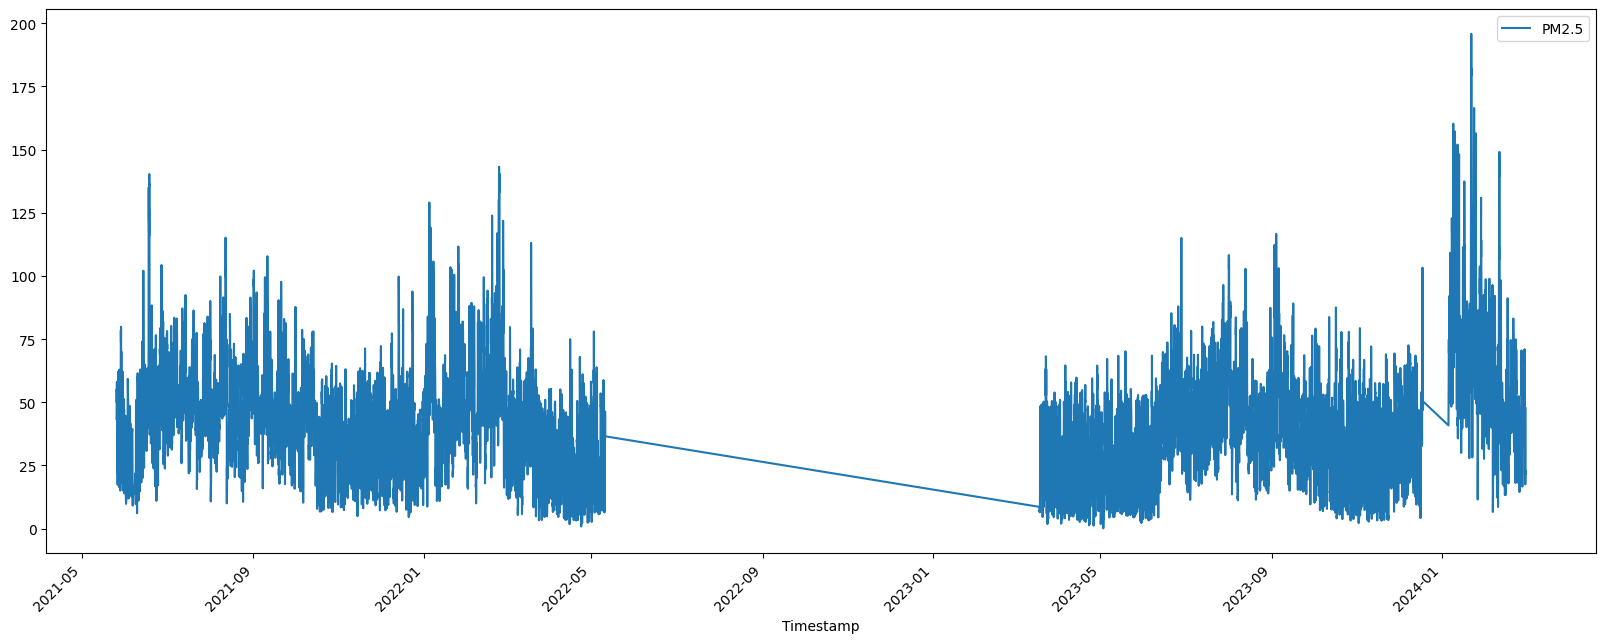

In [93]:
df_gik.plot(x='Timestamp',y='PM2.5',figsize=(20,8))
plt.xticks(rotation=45)
plt.show()

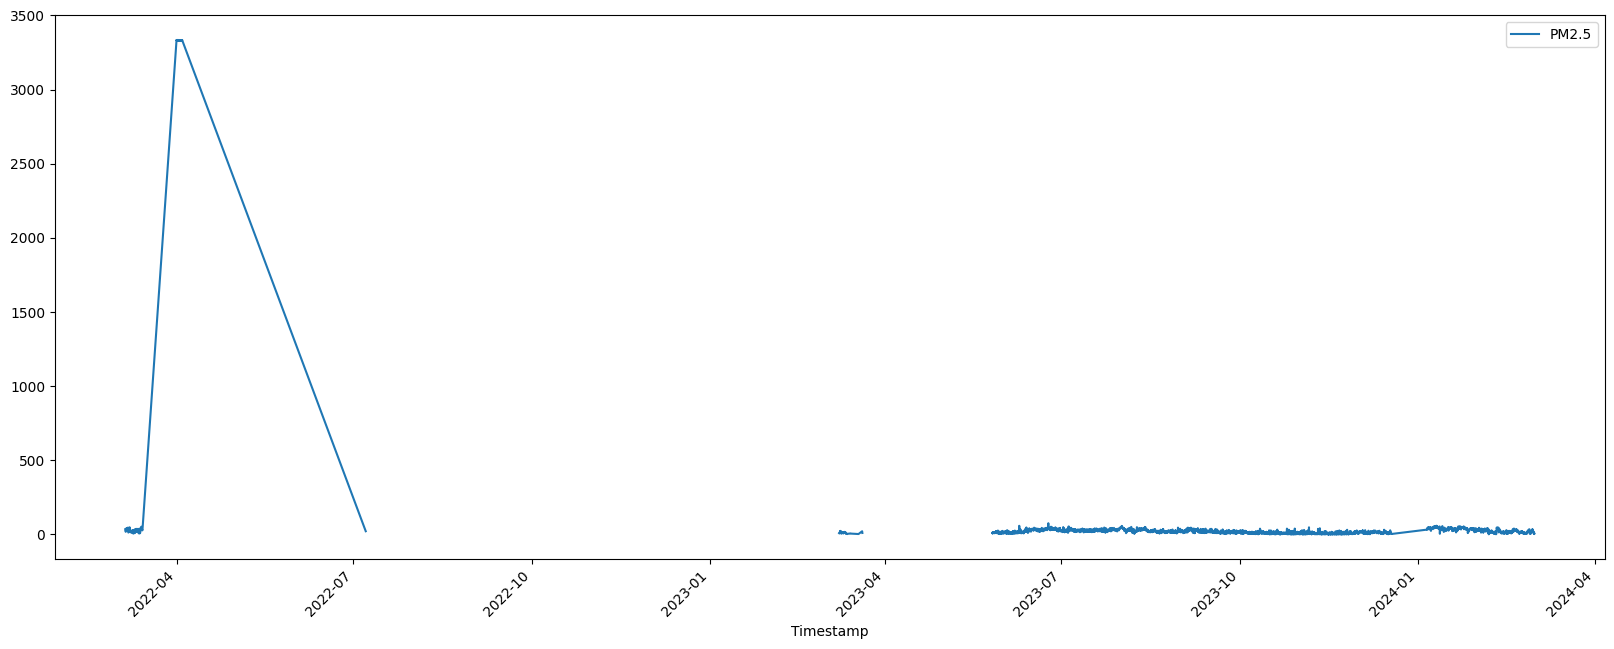

In [94]:
df_jal.plot(x='Timestamp',y='PM2.5',figsize=(20,8))
plt.xticks(rotation=45)
plt.show()

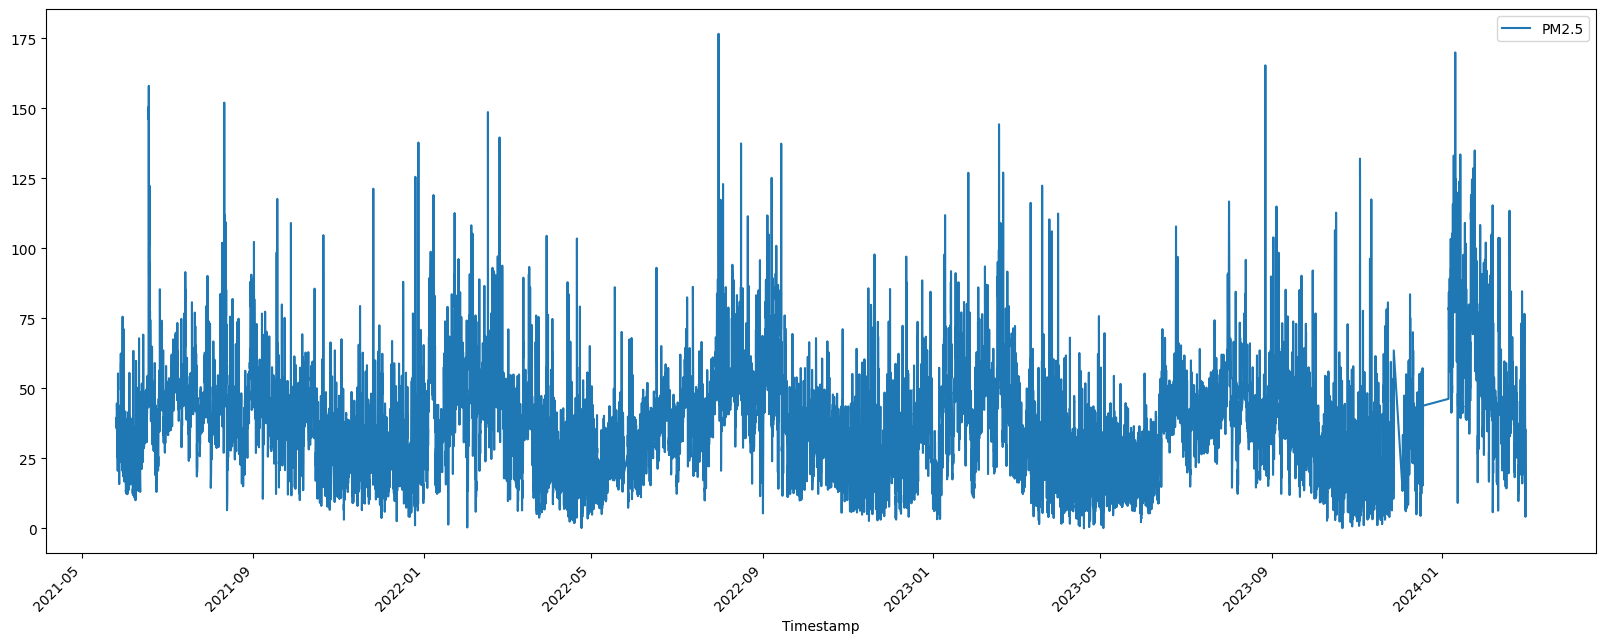

In [95]:
df_monK.plot(x='Timestamp',y='PM2.5',figsize=(20,8))
plt.xticks(rotation=45)
plt.show()

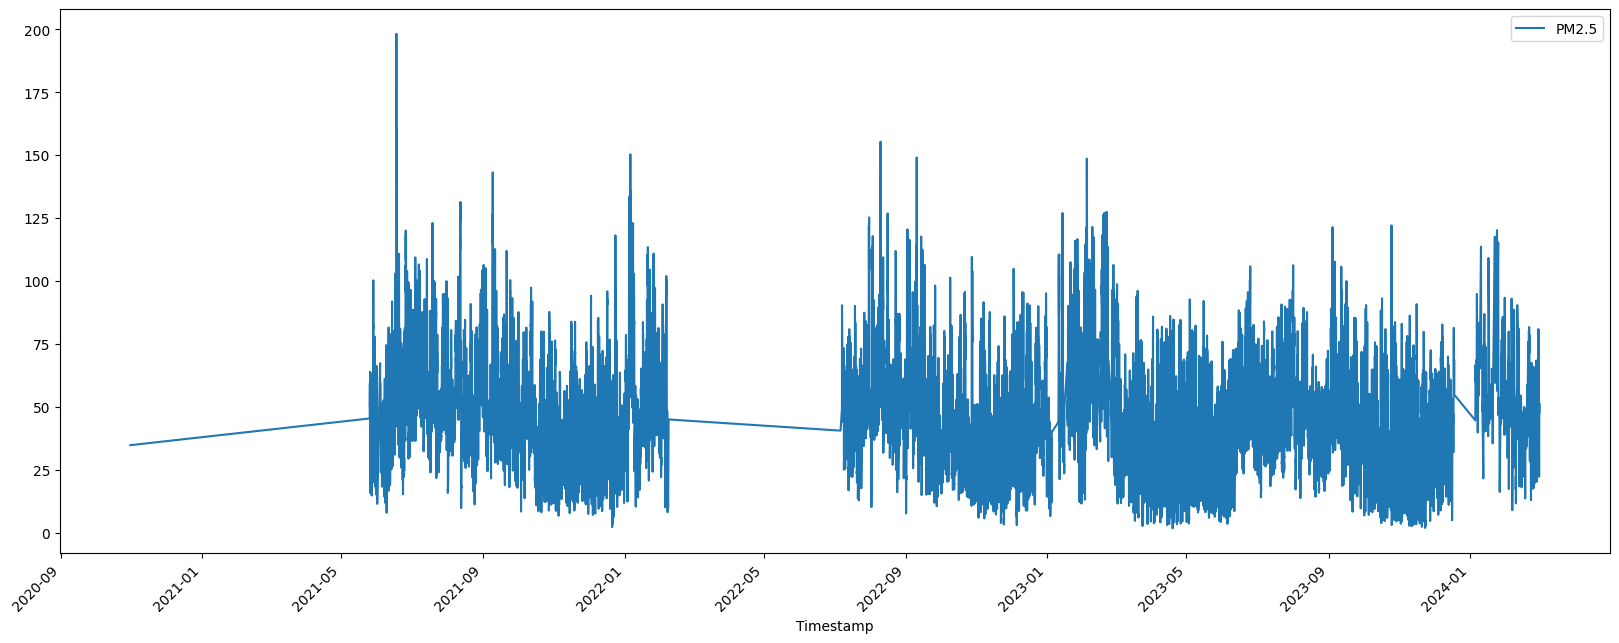

In [96]:
df_rus.plot(x='Timestamp',y='PM2.5',figsize=(20,8))
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Year'>

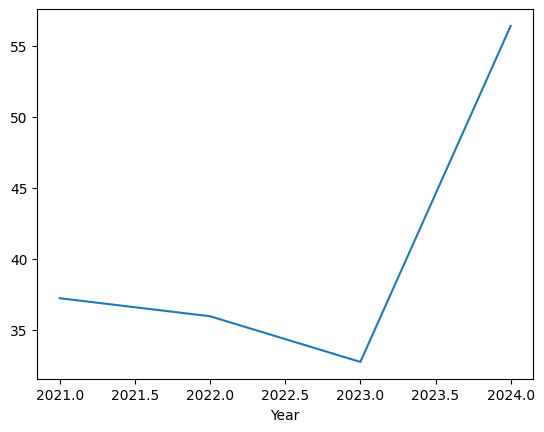

In [97]:
df_monK.groupby('Year')['PM2.5'].mean().plot()

<Axes: xlabel='Year', ylabel='PM2.5'>

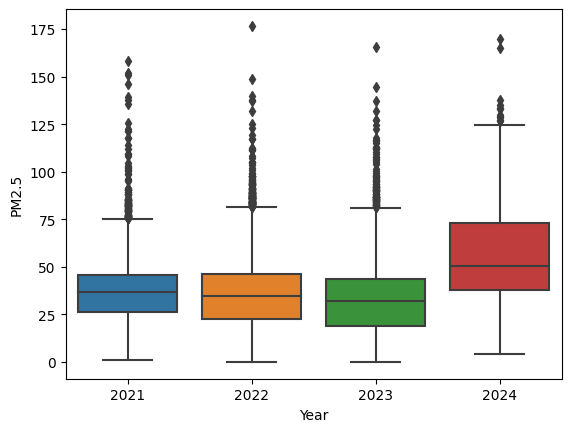

In [98]:
df_monK_year=df_monK.loc[:,['Year','PM2.5']]
sns.boxplot(x='Year', y='PM2.5',data=df_monK_year)

<Axes: xlabel='Month'>

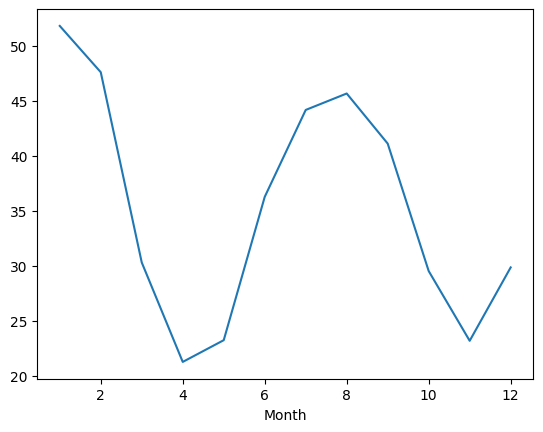

In [99]:
df_monK.groupby('Month')['PM2.5'].mean().plot()

<Axes: xlabel='Month', ylabel='PM2.5'>

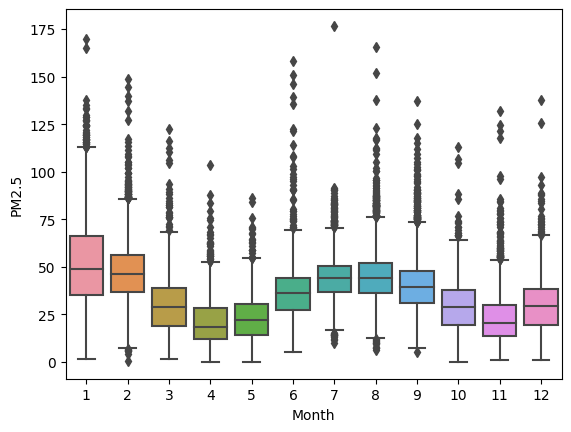

In [100]:
df_monK_month=df_monK.loc[:,['Month','PM2.5']]
sns.boxplot(x='Month', y='PM2.5',data=df_monK_month)

<Axes: xlabel='Day'>

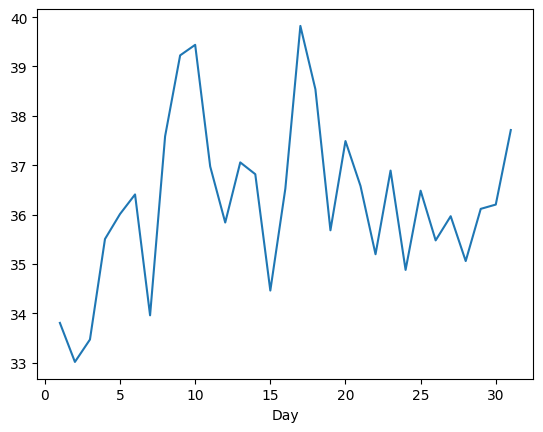

In [101]:
df_monK.groupby('Day')['PM2.5'].mean().plot()

<Axes: xlabel='Day', ylabel='PM2.5'>

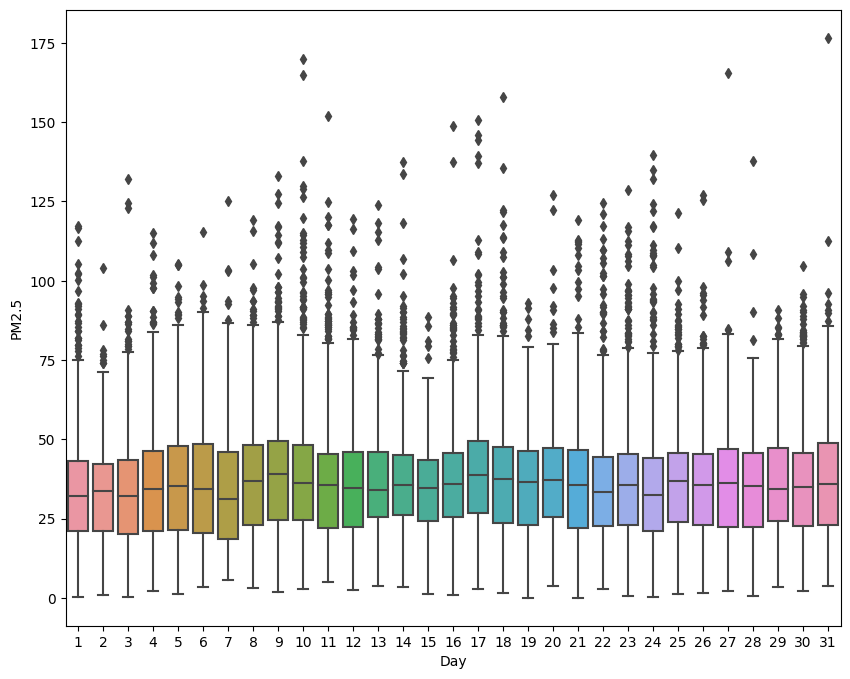

In [102]:
df_monK_day=df_monK.loc[:,['Day','PM2.5']]
plt.figure(figsize=(10,8))
sns.boxplot(x='Day', y='PM2.5',data=df_monK_day)

<Axes: xlabel='Hour'>

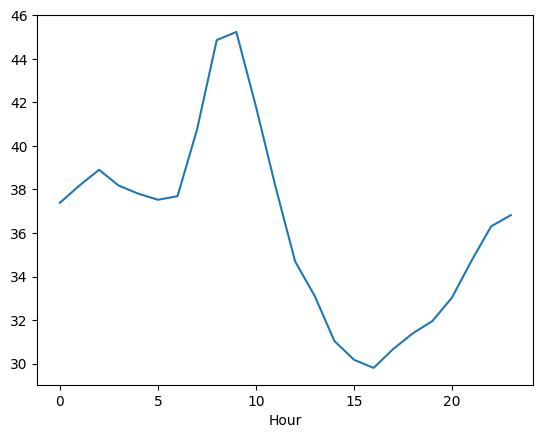

In [103]:
df_monK.groupby('Hour')['PM2.5'].mean().plot()

<Axes: xlabel='Hour', ylabel='PM2.5'>

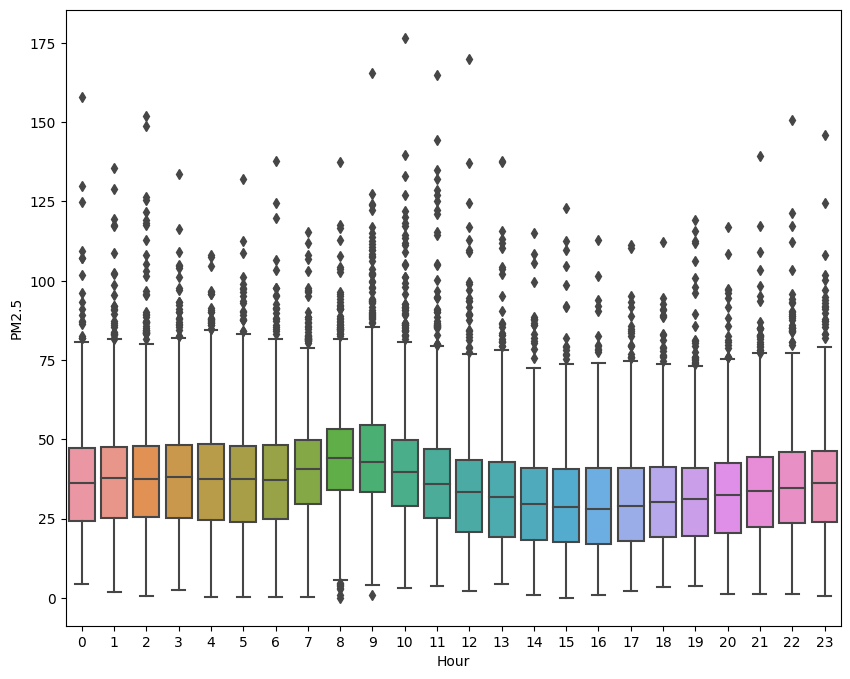

In [104]:
df_monK_hour=df_monK.loc[:,['Hour','PM2.5']]
plt.figure(figsize=(10,8))
sns.boxplot(x='Hour', y='PM2.5',data=df_monK_hour)

In [105]:
df_monK_date=pd.DataFrame(df_monK.groupby('Date')['PM2.5'].mean())
df_monK_date

,PM2.5
Date,
2021-05-25,37.182757
2021-05-26,32.688917
2021-05-27,31.959205
2021-05-28,37.402642
2021-05-29,33.544328
...,...
2024-02-25,24.467991
2024-02-26,44.866684
2024-02-27,43.639373


<Axes: xlabel='Date'>

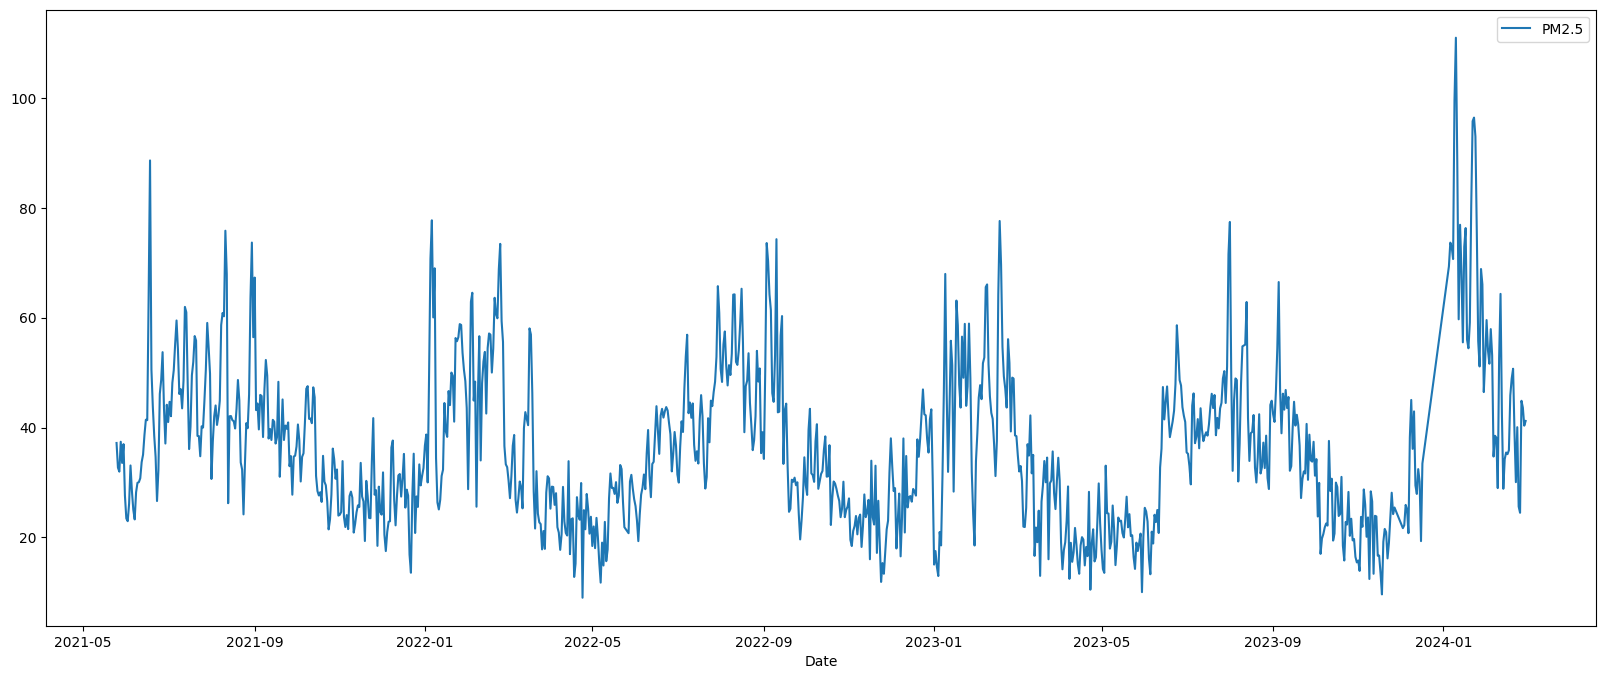

In [106]:
df_monK_date.plot(figsize=(20,8))

In [107]:
dataset  = df_monK_date.values
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

789

In [108]:
sc = MinMaxScaler(feature_range=(0,1))
scaled_data = sc.fit_transform(dataset)
scaled_data

array([[0.27634469],
       [0.23229488],
       [0.22514205],
       [0.27850006],
       [0.24067984],
       [0.27425345],
       [0.18248318],
       [0.1415833 ],
       [0.13666711],
       [0.16804128],
       [0.23618339],
       [0.19101154],
       [0.15720792],
       [0.13985077],
       [0.18834346],
       [0.20520424],
       [0.20633917],
       [0.2133691 ],
       [0.24220535],
       [0.25545555],
       [0.29055309],
       [0.31788863],
       [0.31707421],
       [0.53831921],
       [0.78086128],
       [0.40725258],
       [0.34108531],
       [0.28941971],
       [0.25127099],
       [0.17266033],
       [0.22742403],
       [0.36391619],
       [0.38899189],
       [0.43849532],
       [0.3383094 ],
       [0.27534544],
       [0.34456839],
       [0.31374911],
       [0.34981121],
       [0.3241358 ],
       [0.38371437],
       [0.40627435],
       [0.45312927],
       [0.49507292],
       [0.44355631],
       [0.36382166],
       [0.37251784],
       [0.338

In [109]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
num = 60
for i in range(num, len(train_data)):
    x_train.append(train_data[i-num:i , 0])
    y_train.append(train_data[i , 0])

In [110]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(729, 60, 1)

In [111]:
# model = Sequential()
# model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
# model.add(LSTM(50, return_sequences=False))
# model.add(Dense(25))
# model.add(Dense(1))

# model.compile(optimizer = "adam", loss = "mean_squared_error")

In [112]:
model = Sequential([
    Bidirectional(LSTM(150, dropout=0.3, return_sequences=True, input_shape=(30,1))),
    Bidirectional(LSTM(150, dropout=0.3, return_sequences=True)),
    Bidirectional(LSTM(150, dropout=0.3)),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(7)
])

model.compile(
    loss='mae',
    optimizer=Adam(learning_rate=1e-5),
    metrics=['mse']
)

In [118]:
model.fit(x_train,y_train, batch_size=1, epochs=100)

Epoch 1/100
729/729 ━━━━━━━━━━━━━━━━━━━━ 119s 163ms/step - loss: 0.1439 - mse: 0.0330
Epoch 2/100
729/729 ━━━━━━━━━━━━━━━━━━━━ 117s 161ms/step - loss: 0.1423 - mse: 0.0335
Epoch 3/100
729/729 ━━━━━━━━━━━━━━━━━━━━ 143s 162ms/step - loss: 0.1333 - mse: 0.0310
Epoch 4/100
729/729 ━━━━━━━━━━━━━━━━━━━━ 141s 161ms/step - loss: 0.1236 - mse: 0.0265
Epoch 5/100
729/729 ━━━━━━━━━━━━━━━━━━━━ 139s 158ms/step - loss: 0.1232 - mse: 0.0258
Epoch 6/100
729/729 ━━━━━━━━━━━━━━━━━━━━ 143s 159ms/step - loss: 0.1277 - mse: 0.0282
Epoch 7/100
729/729 ━━━━━━━━━━━━━━━━━━━━ 117s 160ms/step - loss: 0.1199 - mse: 0.0248
Epoch 8/100
729/729 ━━━━━━━━━━━━━━━━━━━━ 140s 158ms/step - loss: 0.1194 - mse: 0.0252
Epoch 9/100
729/729 ━━━━━━━━━━━━━━━━━━━━ 144s 160ms/step - loss: 0.1173 - mse: 0.0240
Epoch 10/100
729/729 ━━━━━━━━━━━━━━━━━━━━ 151s 172ms/step - loss: 0.1067 - mse: 0.0196
Epoch 11/100
729/729 ━━━━━━━━━━━━━━━━━━━━ 133s 182ms/step - loss: 0.1156 - mse: 0.0230
Epoch 12/100
729/729 ━━━━━━━━━━━━━━━━━━━━ 135s 185ms

**Prediction**

In [119]:
test_data = scaled_data[training_data_len-60: , :]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(num, len(test_data)):
      x_test.append(test_data[i-num:i, 0])

In [120]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [121]:
predictions = model.predict(x_test)
predictions = sc.inverse_transform(predictions)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step


In [122]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

7.802405896155407